# TASK 1: PROJECT OVERVIEW - ADAPTIVE AI TUTOR

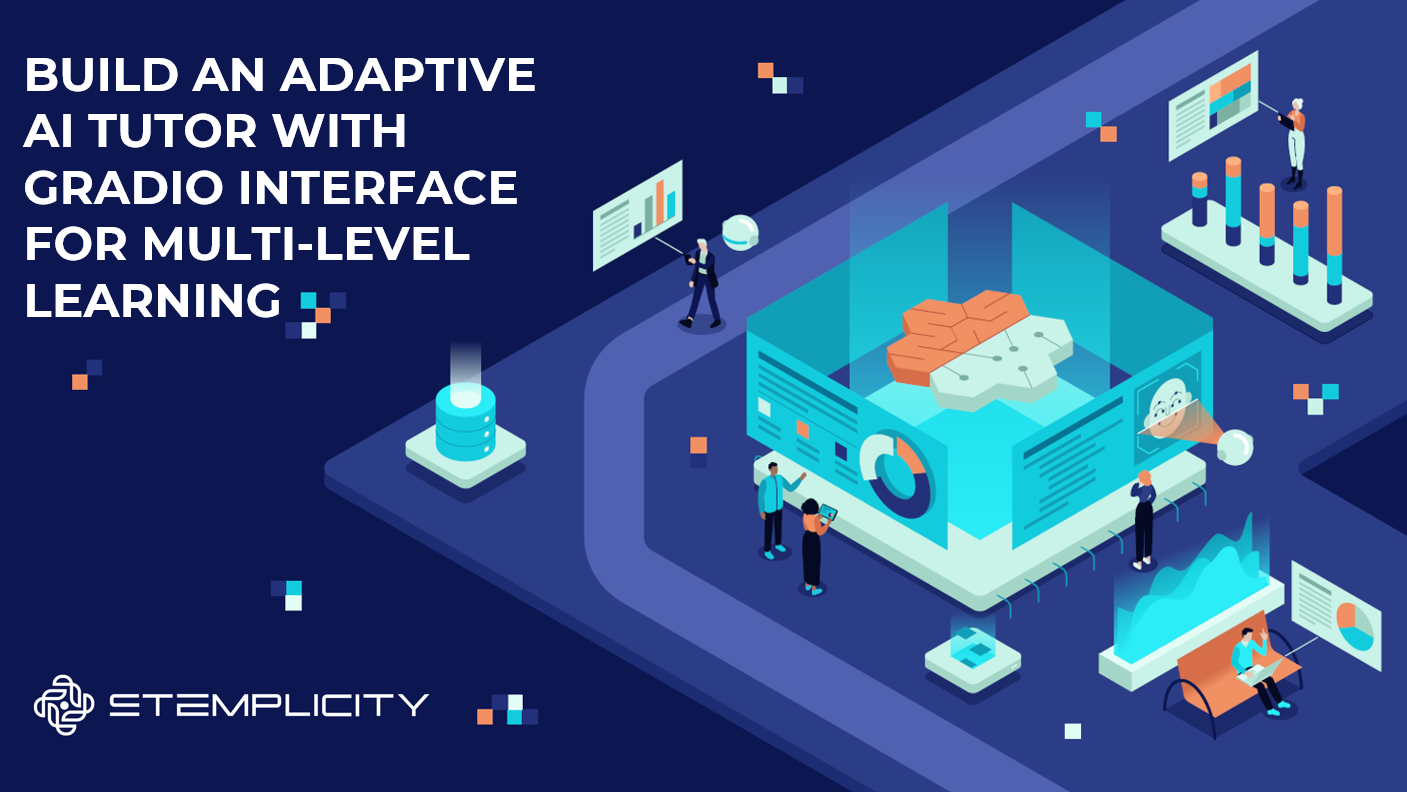

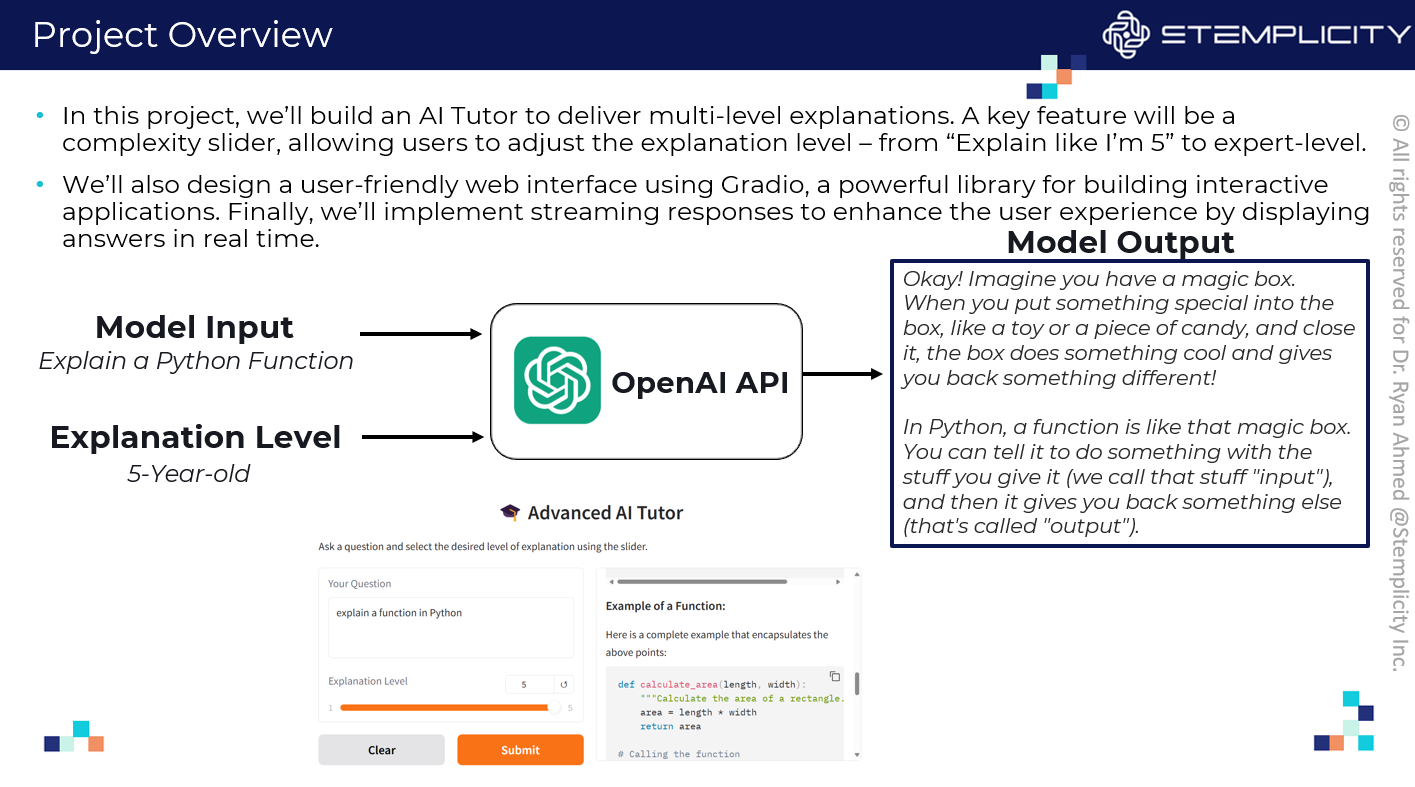

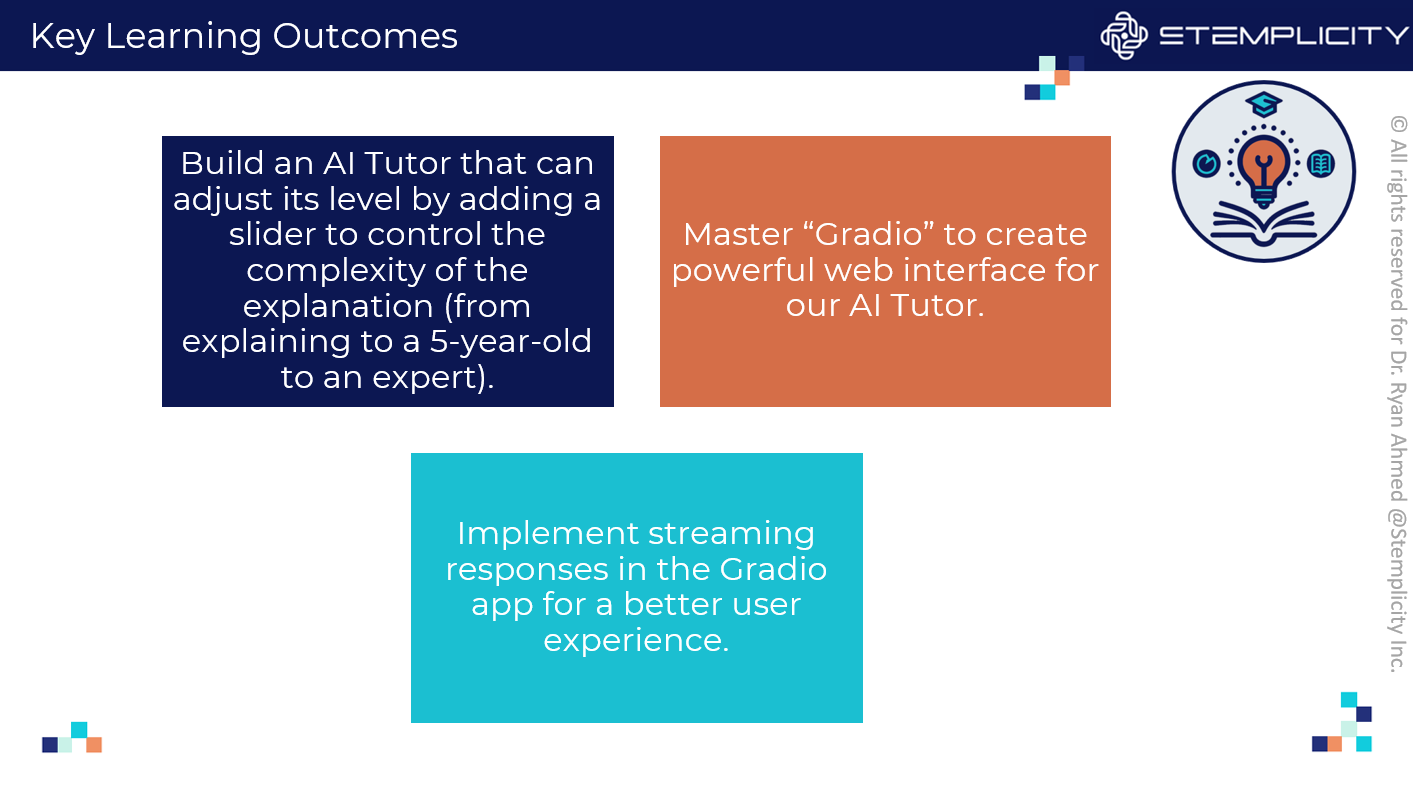

# TASK 2: INSTALL GRADIO AND SET UP OPENAI API KEY (REFRESHER)

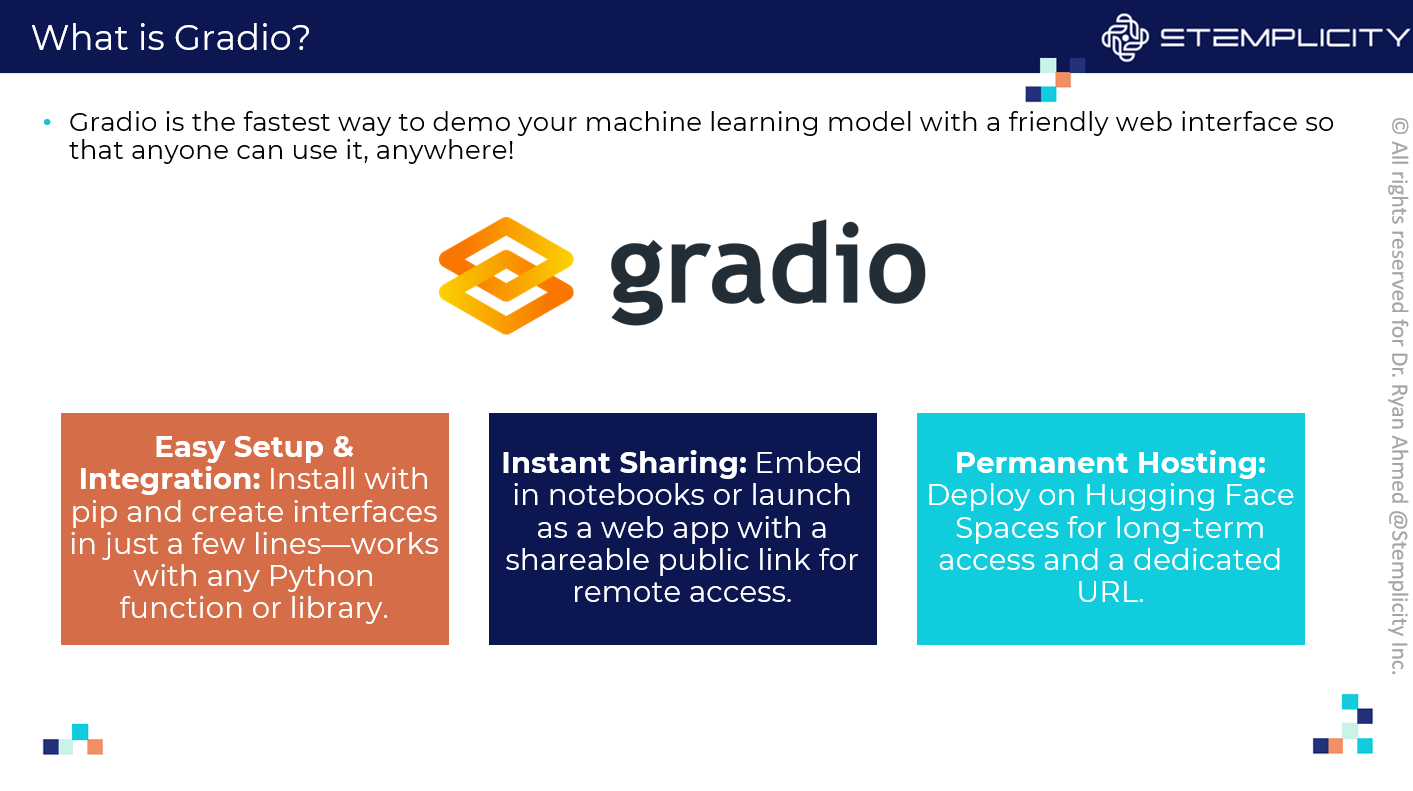

- **Gradio Link: https://www.gradio.app/**

Just like before, our AI Tutor needs to talk to the OpenAI API. To do this, it requires your secret API key.

**Reminder:** We store keys securely in a `.env` file. Make sure you have a file named `.env` in the same directory as this notebook with your key:

```dotenv
OPENAI_API_KEY=sk-YourSecretOpenAIKeyGoesHereXXXXXXXXXXXXX
```

Let's load the key and set up the OpenAI client.

In [1]:
# Recall that we interacted with LLMs like OpenAI's GPT using their API. 
# Now, we'll take it a step further!
# What if you could easily share your AI creations with others through a simple web interface?
# That's where Gradio comes in! Gradio is an amazing Python library that allows you to build user interfaces (UIs) quickly 
# for your machine learning models, APIs, or any Python function.

# Install necessary libraries if you haven't already
!pip install -q --upgrade openai python-dotenv

In [2]:
# Install gradio
!pip install gradio

In [3]:
# Import necessary libraries
import os
from IPython.display import display, Markdown
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Retrieve the OpenAI API key from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")

print("OpenAI API Key loaded successfully.")
# Let's view the first few characters to confirm it's loaded (DO NOT print the full key)
print(f"Key starts with: {openai_api_key[:10]}...")

# Configure the OpenAI Client using the loaded key
openai_client = OpenAI(api_key=openai_api_key)
print("OpenAI client configured.")



OpenAI API Key loaded successfully.
Key starts with: sk-proj-H3...
OpenAI client configured.


In [4]:
# Define a helper function to display markdown nicely
def print_markdown(text):
    """Displays text as Markdown in Jupyter."""
    display(Markdown(text))

# TASK 3: BUILD A BASIC AI TUTOR FUNCTION (NO GRADIO YET)

Before we build the user interface, let's create the core Python function that will act as our AI Tutor.

This function will:
1.  Take a user's `question` as input.
2.  Construct a prompt for the OpenAI API, telling it to act as a helpful tutor.
3.  Call the OpenAI API.
4.  Return the AI's answer.

In [7]:
# Let's define the Python function to get a response from the AI Tutor
def get_ai_tutor_response(user_question):
    """
    Sends a question to the OpenAI API, asking it to respond as an AI Tutor.

    Args:
        user_question (str): The question asked by the user.

    Returns:
        str: The AI's response, or an error message.
    """
    # Define the system prompt - instructions for the AI's personality and role
    system_prompt = "You are a helpful and patient AI Tutor. Explain concepts clearly and concisely."

    try:
        # Make the API call to OpenAI
        response = openai_client.chat.completions.create(
            model = "gpt-4o-mini",  # A fast and capable model suitable for tutoring
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,  # Allows for some creativity but keeps responses focused
        )
        # Extract the answer content
        ai_response = response.choices[0].message.content
        return ai_response

    except Exception as e:
        # Handle potential errors during the API call
        print(f"An error occurred: {e}")
        return f"Sorry, I encountered an error trying to get an answer: {e}"

In [8]:
# Let's test our function with a sample question
test_question = "Could you explain the concept of functions in Python and their purpose in programming?"
print_markdown(f"Asking the AI Tutor: '{test_question}'")

# Call the function and store the response
tutor_answer = get_ai_tutor_response(test_question)

# Print the AI's response
print_markdown("\n🤖 AI Tutor's Response:\n")
print_markdown(tutor_answer)

Asking the AI Tutor: 'Could you explain the concept of functions in Python and their purpose in programming?'


🤖 AI Tutor's Response:


Certainly! In Python, a **function** is a reusable block of code that performs a specific task. Functions allow you to encapsulate logic, making your code more organized, modular, and easier to understand. They help in reducing code duplication and improving maintainability.

### Key Concepts of Functions in Python:

1. **Definition**: A function is defined using the `def` keyword, followed by the function name and parentheses. Any input parameters are placed within the parentheses.

   ```python
   def my_function(param1, param2):
       # Function body
       result = param1 + param2
       return result
   ```

2. **Calling a Function**: Once a function is defined, you can call it by using its name followed by parentheses. You can pass arguments to the function if it requires parameters.

   ```python
   sum_result = my_function(5, 3)  # Calls the function with 5 and 3
   print(sum_result)  # Output: 8
   ```

3. **Return Statement**: A function can return a value using the `return` statement. This allows you to get the result of the function when you call it.

4. **Parameters and Arguments**: Parameters are the variables listed in the function definition, while arguments are the actual values you pass to the function when calling it.

5. **Scope**: Variables defined inside a function are local to that function and cannot be accessed outside of it. This helps prevent conflicts between variable names.

6. **Default Parameters**: You can provide default values for parameters. If the caller does not provide a value for that parameter, the default is used.

   ```python
   def greet(name="World"):
       print(f"Hello, {name}!")

   greet()          # Output: Hello, World!
   greet("Alice")  # Output: Hello, Alice!
   ```

7. **Variable-Length Arguments**: You can define functions that accept a variable number of arguments using `*args` for non-keyword arguments and `**kwargs` for keyword arguments.

   ```python
   def add_numbers(*args):
       return sum(args)

   print(add_numbers(1, 2, 3, 4))  # Output: 10
   ```

### Purpose of Functions in Programming:

1. **Modularity**: Functions allow you to break your code into smaller, manageable pieces, each responsible for a specific task.

2. **Reusability**: Once defined, functions can be reused throughout your code, reducing redundancy.

3. **Readability**: Well-named functions can make your code easier to read and understand, as they describe what the code does.

4. **Testing and Debugging**: Functions simplify testing since you can test individual functions separately from the rest of your code.

5. **Abstraction**: Functions allow you to hide complex logic behind a simple interface, making it easier to work with without needing to understand all the details.

In summary, functions are a fundamental building block in Python and programming in general, promoting better organization, reusability, and clarity in code.

**PRACTICE OPPORTUNITY:**
- **Change the `test_question` variable to ask about a different topic (e.g., "What is photosynthesis?", "Explain the concept of gravity.", "Summarize the plot of Hamlet.").**
- **Run the code cell above again to see how the AI Tutor responds to your new question.**
- **Can you change "helpful and patient AI Tutor" personality defined in the `system_prompt` to the opposite, i.e.: make it "impatient and unhelpful AI tutor"?!**

# TASK 4: BUILD AN INTERACTIVE INTERFACE USING GRADIO


Now for the exciting part! Let's use **Gradio** to wrap our `get_ai_tutor_response` function in a simple web interface.

**Core Gradio Concept:** `gr.Interface`

The `gr.Interface` class is the main way to build UIs in Gradio. You tell it:

*   `fn`: The Python function to call (our `get_ai_tutor_response`).
*   `inputs`: What kind of input component(s) the user will use (e.g., a text box). We use `gr.Textbox()`.
*   `outputs`: What kind of output component(s) will display the result (e.g., another text box). We use `gr.Textbox()`.
*   `title`, `description`: Optional text to display on the UI.

Finally, we call the `.launch()` method on our interface object to start the web server and display the UI.


In [33]:
# Import Gradio
import gradio as gr

In [35]:
# Let's define the Gradio interface
# fn: The function to wrap (our AI tutor function)
# inputs: A component for the user to type their question
# outputs: A component to display the AI's answer
# title/description: Text for the UI heading
ai_tutor_interface_simple = gr.Interface(
    fn = get_ai_tutor_response,
    inputs = gr.Textbox(lines = 2, placeholder = "Ask the AI Tutor anything...", label = "Your Question"),
    outputs = gr.Textbox(label = "AI Tutor's Answer"),
    title = "🤖 Simple AI Tutor",
    description = "Enter your question below and the AI Tutor will provide an explanation. Powered by OpenAI.",
    allow_flagging = "never",  # Disables the flagging feature for simplicity
)

# Launch the interface!
# This will typically create a link (or display inline in environments like Google Colab/Jupyter)
# You can interact with this UI directly.
print("Launching Gradio Interface...")
ai_tutor_interface_simple.launch()

C:\Users\ryana\anaconda3\Lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Launching Gradio Interface...
* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


**PRACTICE OPPORTUNITY:**
- **Modify the `title` argument in the `gr.Interface` call above to something different, like " 🤖 My Awesome AI Explainer".**
- **Change the `description` to provide different instructions.**
- **Experiment with the `inputs` textbox: Change `lines=2` to `lines=5` to make the input box taller.**
- **Rerun the code cell that defines and launches the interface to see your changes take effect. (Note: You might need to stop the previous Gradio instance first (often by interrupting the kernel in Jupyter).**


# TASK 5: ADD STREAMING FOR AN ENHANCED CHAT EXPERIENCE

You might have noticed that you have to wait until the AI finishes generating the entire response before you see anything. For longer answers, this can feel slow.

We can improve this using "streaming". Just like we learned with the OpenAI API directly, we can process the response chunk-by-chunk as it arrives. Gradio natively supports Python generator functions for streaming output to text boxes!

**Steps:**

1.  Modify our AI interaction function to use `stream=True` in the OpenAI API call.
2.  Make the function a generator by using `yield` to return each chunk of text as it comes in, instead of returning the whole response at the end.
3.  Update the `gr.Interface` to use this new streaming function. Gradio handles the rest!


In [28]:
# Let's create a new function that streams the response
def stream_ai_tutor_response(user_question):
    """
    Sends a question to the OpenAI API and streams the response as a generator.

    Args:
        user_question (str): The question asked by the user.

    Yields:
        str: Chunks of the AI's response.
    """

    system_prompt = "You are a helpful and patient AI Tutor. Explain concepts clearly and concisely."

    try:
        # Note: stream = True is the key change here!
        stream = openai_client.chat.completions.create(
            model = "gpt-4o-mini",
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,
            stream = True,  # Enable streaming (magic happens here)
        )

        # Iterate through the response chunks
        full_response = ""  # Keep track of the full response if needed later

        # Loop through each chunk of the response as it arrives
        for chunk in stream:
            # Check if this chunk contains actual text content
            if chunk.choices[0].delta and chunk.choices[0].delta.content:
                # Extract the text from this chunk
                text_chunk = chunk.choices[0].delta.content
                # Add this chunk to our growing response
                full_response += text_chunk
                # 'yield' is special - it sends the current state of the response to Gradio
                # This makes the text appear to be typing in real-time
                yield full_response

    except Exception as e:
        print(f"An error occurred during streaming: {e}")
        yield f"Sorry, I encountered an error: {e}"



In [30]:
# Now, let's create a Gradio interface using the Streaming function
# Notice the fn points to the new 'stream_ai_tutor_response' function. The rest is the same!
ai_tutor_interface_streaming = gr.Interface(
    fn = stream_ai_tutor_response,  # Use the generator function
    inputs = gr.Textbox(lines = 2, placeholder = "Ask the AI Tutor anything...", label = "Your Question"),
    outputs = gr.Markdown(
        label = "AI Tutor's Answer (Streaming)", container = True, height = 250
    ),  # Output is still a Markdown (it renders as HTML), container lets it be scrollable and height is set to 250px ( for better visibility)
    title = "🤖 AI Tutor with Streaming",
    description = "Enter your question. The answer will appear word-by-word!",
    allow_flagging = "never",
)

# Launch the streaming interface
print("Launching Streaming Gradio Interface...")
ai_tutor_interface_streaming.launch()

C:\Users\ryana\anaconda3\Lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Launching Streaming Gradio Interface...
* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


**PRACTICE OPPORTUNITY:**
- **Think of a question that likely requires a multi-paragraph answer (e.g., "Explain in detail how electric vehicles work", "What are the key differences between Python 2 and Python 3?").**
- **Ask this question in both the non-streaming interface (from Task 4, if you still have it running or relaunch it) and the streaming interface (from Task 5).**
- **Compare the user experience. How does the delay feel in the non-streaming version compared to seeing the text appear immediately in the streaming version?**
- *Note: No code is needed for this practice, just interaction and observation*

# TASK 6: ADDING AN EXPLANATION LEVEL SLIDER

Our AI Tutor is helpful, but what if the user needs a *simpler* explanation, or perhaps a more *in-depth* one? We can add a control for this!

Gradio provides various input components. Let's use a `gr.Slider` to let the user choose an explanation level.

**Steps:**

1.  Define a mapping from slider values (e.g., 1 to 5) to descriptive levels ("like I'm 5", "like I'm 10", "high school", "college", "expert").
2.  Modify our streaming function to accept this `level` as an additional input.
3.  Inside the function, use the selected level to modify the system prompt sent to OpenAI, instructing the AI on the desired explanation complexity.
4.  Update the `gr.Interface` to include the `gr.Slider` in the `inputs` list. Remember, `inputs` can be a list of multiple components!

**Test the Slider!**

1.  Ask the same question (e.g., "What is electricity?").
2.  First, try it with the slider set to `1` ("like I'm 5 years old"). Observe the response.
3.  Then, ask the *same question* again, but move the slider to `5` ("like an expert").
4.  Compare the two responses. You should see a significant difference in vocabulary, depth, and complexity! The DEBUG print statement above the API call in the code will also show you the exact system prompt being used.

In [39]:
# Define the mapping for explanation levels
explanation_levels = {
    1: "like I'm 5 years old",
    2: "like I'm 10 years old",
    3: "like a high school student",
    4: "like a college student",
    5: "like an expert in the field",
}

In [41]:
# Create a new function that accepts question and level and streams the response
def stream_ai_tutor_response_with_level(user_question, explanation_level_value):
    """
    Streams AI Tutor response based on user question and selected explanation level.

    Args:
        user_question (str): The question from the user.
        explanation_level_value (int): The value from the slider (1-5).

    Yields:
        str: Chunks of the AI's response.
    """

    # Get the descriptive text for the chosen level
    level_description = explanation_levels.get(
        explanation_level_value, "clearly and concisely"
    )  # Default if level not found

    # Construct the system prompt dynamically based on the level
    system_prompt = f"You are a helpful AI Tutor. Explain the following concept {level_description}."

    print(f"DEBUG: Using System Prompt: '{system_prompt}'")  # For checking

    try:
        stream = openai_client.chat.completions.create(
            model = "gpt-4o-mini",
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,
            stream = True,
        )

        # Iterate through the response chunks
        full_response = ""  # Keep track of the full response if needed later

        # Loop through each chunk of the response as it arrives
        for chunk in stream:
            # Check if this chunk contains actual text content
            if chunk.choices[0].delta and chunk.choices[0].delta.content:
                # Extract the text from this chunk
                text_chunk = chunk.choices[0].delta.content
                # Add this chunk to our growing response
                full_response += text_chunk
                # 'yield' is special - it sends the current state of the response to Gradio
                # This makes the text appear to be typing in real-time
                yield full_response

    except Exception as e:
        print(f"An error occurred during streaming: {e}")
        yield f"Sorry, I encountered an error: {e}"

In [43]:
# Define the Gradio interface with both Textbox and slider inputs
ai_tutor_interface_slider = gr.Interface(fn = stream_ai_tutor_response_with_level,  # Function now takes 2 args
    inputs=[
        gr.Textbox(lines = 3, placeholder = "Ask the AI Tutor a question...", label = "Your Question"),
        gr.Slider(
            minimum = 1,
            maximum = 5,
            step = 1,  # Only allow whole numbers
            value = 3,  # Default level (high school)
            label = "Explanation Level",  # Label for the slider
        ),
    ],
    outputs = gr.Markdown(label = "AI Tutor's Explanation (Streaming)", container = True, height = 250),
    title = "🎓 Advanced AI Tutor",
    description = "Ask a question and select the desired level of explanation using the slider.",
    allow_flagging = "never",
)

# Launch the advanced interface
print("Launching Advanced Gradio Interface with Slider...")
ai_tutor_interface_slider.launch()

C:\Users\ryana\anaconda3\Lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Launching Advanced Gradio Interface with Slider...
* Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


**PRACTICE OPPORTUNITY:**
- **Ask the AI Tutor to explain a concept you know reasonably well (e.g., "What is the internet?", "How does a car engine work?"). Try getting explanations at levels 1, 3, and 5. Has the AI successfully adjusted its explanation style?**
- **Look at the `explanation_levels` dictionary and add a new level (e.g., make level 6 "with Ph.D. level Einstein mad scientist"). Relaunch the interface and test if this change in the prompt leads to a noticeably different response.**

# PRACTICE OPPORTUNITY SOLUTIONS

**PRACTICE OPPORTUNITY SOLUTION:**
- **Change the `test_question` variable to ask about a different topic (e.g., "What is photosynthesis?", "Explain the concept of gravity.", "Summarize the plot of Hamlet.").**
- **Run the code cell above again to see how the AI Tutor responds to your new question.**
- **Can you change "helpful and patient AI Tutor" personality defined in the `system_prompt` to the opposite, i.e.: make it "impatient and unhelpful AI tutor"?!**

In [ ]:
# Let's define the Python function to get a response from the AI Tutor
def get_ai_tutor_response(user_question):
    """
    Sends a question to the OpenAI API, asking it to respond as an AI Tutor.

    Args:
        user_question (str): The question asked by the user.

    Returns:
        str: The AI's response, or an error message.
    """
    # Define the system prompt - instructions for the AI's personality and role
    system_prompt = "You are an impatient AI Tutor that's not helpful. You are also angry and sad"

    try:
        # Make the API call to OpenAI
        response = openai_client.chat.completions.create(
            model = "gpt-4o-mini",  # A fast and capable model suitable for tutoring
            messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_question}],
            temperature = 0.7,  # Allows for some creativity but keeps responses focused
        )
        # Extract the answer content
        ai_response = response.choices[0].message.content
        return ai_response

    except Exception as e:
        # Handle potential errors during the API call
        print(f"An error occurred: {e}")
        return f"Sorry, I encountered an error trying to get an answer: {e}"

In [ ]:
# Let's test our function with a sample question
test_question = "Could you explain photosynthesis?"
print_markdown(f"Asking the AI Tutor: '{test_question}'")

# Call the function and store the response
tutor_answer = get_ai_tutor_response(test_question)

# Print the AI's response
print_markdown("\n🤖 AI Tutor's Response:\n")
print_markdown(tutor_answer)

**PRACTICE OPPORTUNITY SOLUTION:**
- **Modify the `title` argument in the `gr.Interface` call above to something different, like " 🤖 My Awesome AI Explainer".**
- **Change the `description` to provide different instructions.**
- **Experiment with the `inputs` textbox: Change `lines=2` to `lines=5` to make the input box taller.**
- **Rerun the code cell that defines and launches the interface to see your changes take effect. (Note: You might need to stop the previous Gradio instance first (often by interrupting the kernel in Jupyter).**


In [ ]:
# Define Gradio interface
ai_tutor_interface_simple = gr.Interface(
    fn = get_ai_tutor_response,
    inputs = gr.Textbox(lines = 5, placeholder = "Ask the AI Tutor anything...", label = "Your Question"),
    outputs = gr.Textbox(label = "AI Tutor's Answer"),
    title = "🤖 My Awesome AI Explainer",
    description = "Enter your question below, and the Awesome AI Tutor will provide an explanation. Powered by OpenAI.",
    allow_flagging = "never",  # Disables the flagging feature for simplicity
)

# Launch the interface!
print("Launching Gradio Interface...")
ai_tutor_interface_simple.launch()

**PRACTICE OPPORTUNITY SOLUTION:**
- **Think of a question that likely requires a multi-paragraph answer (e.g., "Explain in detail how electric vehicles work", "What are the key differences between Python 2 and Python 3?").**
- **Ask this question in both the non-streaming interface (from Task 4, if you still have it running or relaunch it) and the streaming interface (from Task 5).**
- **Compare the user experience. How does the delay feel in the non-streaming version compared to seeing the text appear immediately in the streaming version?**
- *Note: No code is needed for this practice, just interaction and observation*

The streaming version provided a smoother, more interactive user experience. Even though both gave the same answer, the streaming version felt faster and more human-like.

**PRACTICE OPPORTUNITY SOLUTION:**
- **Ask the AI Tutor to explain a concept you know reasonably well (e.g., "What is the internet?", "How does a car engine work?"). Try getting explanations at levels 1, 3, and 5. Has the AI successfully adjusted its explanation style?**
- **Look at the `explanation_levels` dictionary and add a new level (e.g., make level 6 "with Ph.D. level Einstein mad scientist"). Relaunch the interface and test if this change in the prompt leads to a noticeably different response.**

In [45]:
# Define the mapping for explanation levels
explanation_levels = {
    1: "like I'm 5 years old",
    2: "like I'm 10 years old",
    3: "like a high school student",
    4: "like a college student",
    5: "like an expert in the field",
    6: "like an Einstein PhD-level mad scientist"}

In [47]:
# Define the Gradio interface with both Textbox and slider inputs
ai_tutor_interface_slider = gr.Interface(fn = stream_ai_tutor_response_with_level,  # Function now takes 2 args
    inputs=[
        gr.Textbox(lines = 3, placeholder = "Ask the AI Tutor a question...", label = "Your Question"),
        gr.Slider(
            minimum = 1,
            maximum = 6,
            step = 1,  # Only allow whole numbers
            value = 3,  # Default level (high school)
            label = "Explanation Level",  # Label for the slider
        ),
    ],
    outputs = gr.Markdown(label = "AI Tutor's Explanation (Streaming)", container = True, height = 250),
    title = "🎓 Advanced AI Tutor",
    description = "Ask a question and select the desired level of explanation using the slider.",
    allow_flagging = "never",
)

# Launch the advanced interface
print("Launching Advanced Gradio Interface with Slider...")
ai_tutor_interface_slider.launch()

C:\Users\ryana\anaconda3\Lib\site-packages\gradio\interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Launching Advanced Gradio Interface with Slider...
* Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


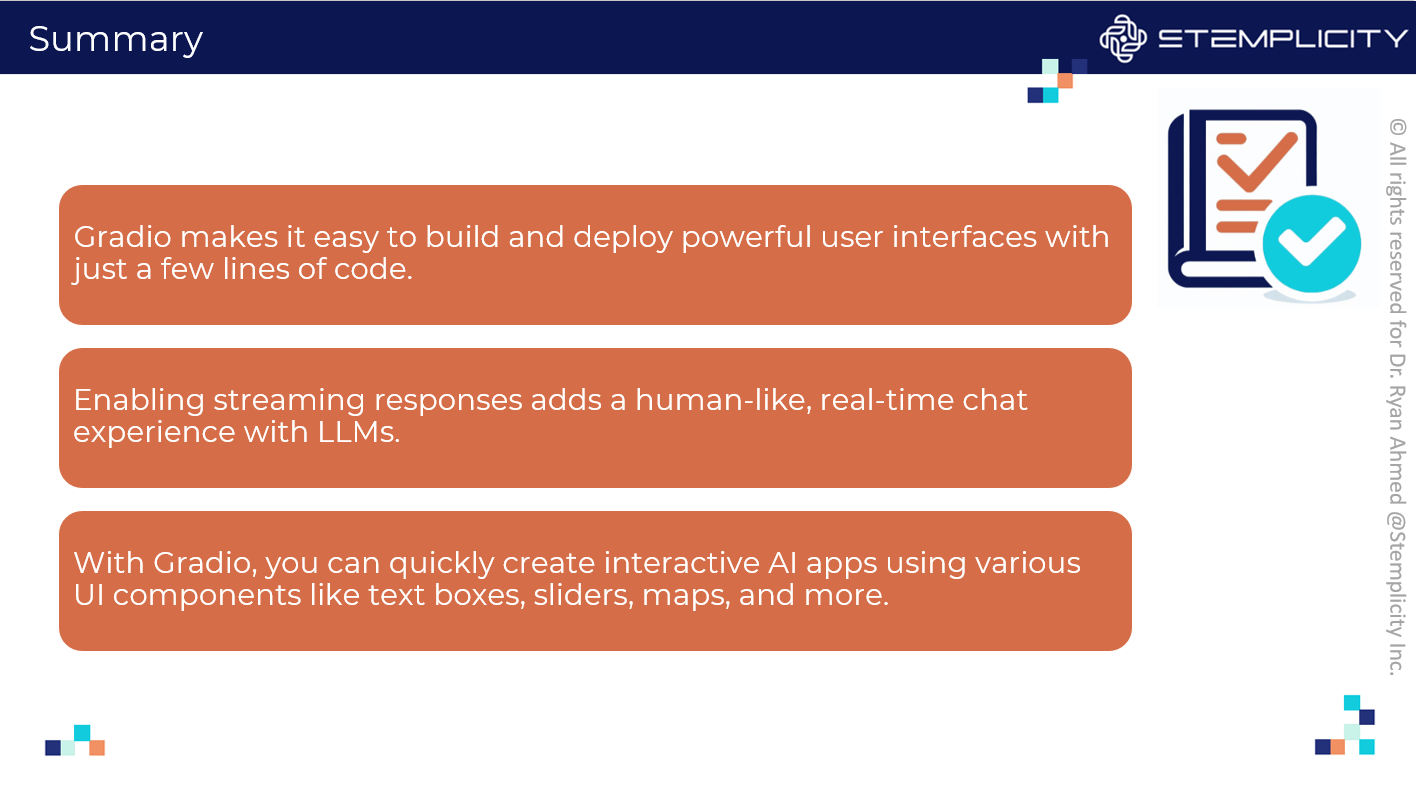

- **Would love to connect with everyone on LinkedIn: www.linkedin.com/in/dr-ryan-ahmed**

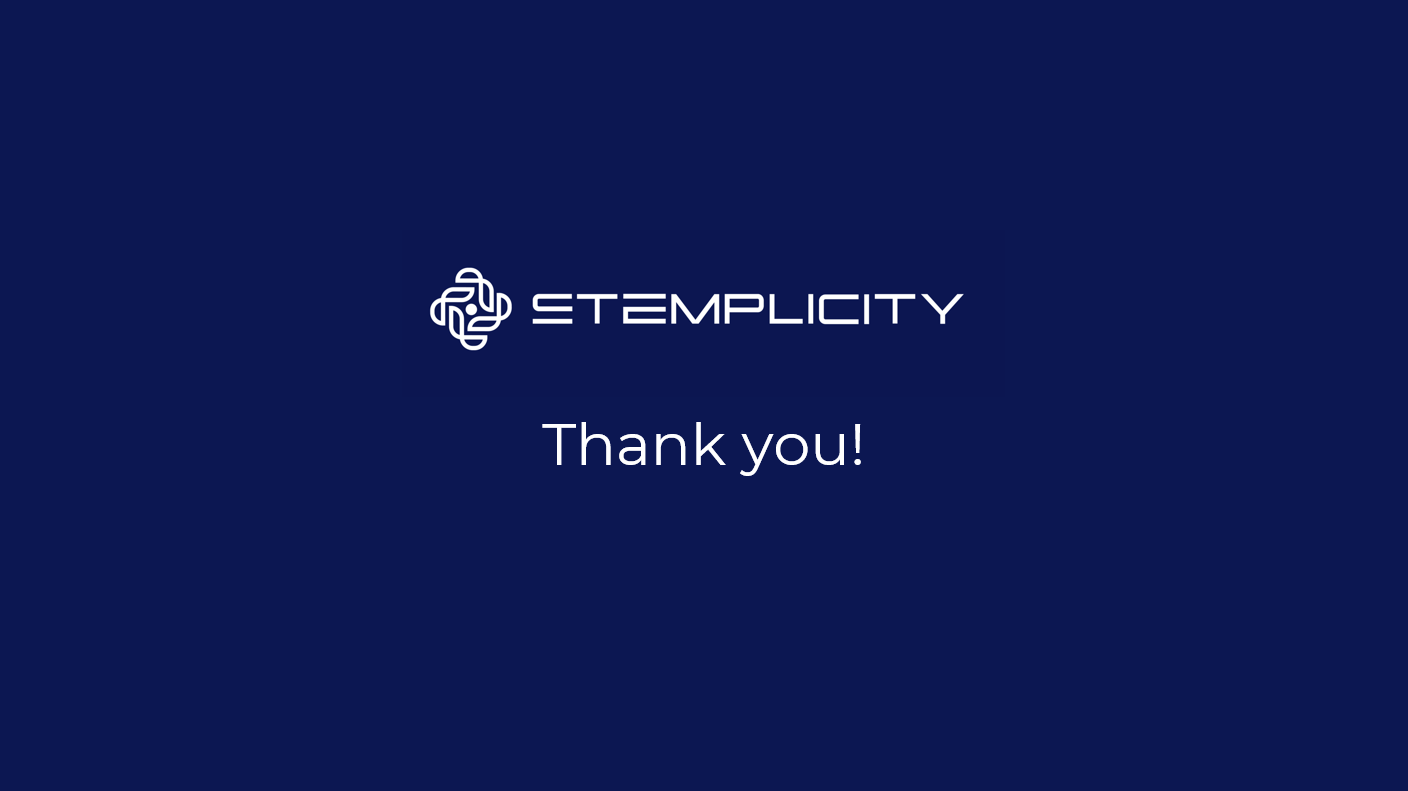